In [1]:
#Noor A Tanjim
#170204064
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Players.csv to Players.csv


{'Players.csv': b'name,age,height_cm,weight_kg,overall,potential,wage_eur,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,value_eur\r\nL. Messi,32,170,72,94,94,0.56,4,4,87,92,92,96,39,66,95.5\r\nCristiano Ronaldo,34,187,83,93,93,0.41,4,5,90,93,82,89,35,78,58.5\r\nNeymar Jr,27,175,68,92,92,0.29,5,5,91,85,87,95,32,58,105.5\r\nE. Hazard,28,175,74,91,91,0.47,4,4,91,83,86,94,35,66,90\r\nK. De Bruyne,28,181,70,91,91,0.37,5,4,76,86,92,86,61,78,90\r\nV. van Dijk,27,193,92,90,91,0.2,3,2,77,60,70,71,90,86,78\r\nL. Modric,33,172,66,90,90,0.34,4,4,74,76,89,89,72,66,45\r\nM. Salah,27,175,71,90,90,0.24,3,4,93,86,81,89,45,74,80.5\r\nK. Mbappe,20,178,73,89,95,0.15,4,5,96,84,78,90,39,75,93.5\r\nK. Koulibaly,28,187,89,89,91,0.15,3,2,71,28,54,67,89,87,67.5\r\nH. Kane,25,188,89,89,91,0.22,4,3,70,91,79,81,47,83,83\r\nN. Kante,28,168,72,89,90,0.23,3,2,78,65,77,81,87,83,66\r\nG. Chiellini,34,187,85,89,89,0.21,3,2,68,46,58,60,90,82,24.5\r\nS. Aguero,31,173,70,89,89,0.31,4,4,80,90,77,88,

In [3]:
Players_df=pd.read_csv('Players.csv')

In [4]:
Players_df.head(10)

,name,age,height_cm,weight_kg,overall,potential,wage_eur,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,value_eur
0,L. Messi,32,170,72,94,94,0.56,4,4,87,92,92,96,39,66,95.5
1,Cristiano Ronaldo,34,187,83,93,93,0.41,4,5,90,93,82,89,35,78,58.5
2,Neymar Jr,27,175,68,92,92,0.29,5,5,91,85,87,95,32,58,105.5
3,E. Hazard,28,175,74,91,91,0.47,4,4,91,83,86,94,35,66,90.0
4,K. De Bruyne,28,181,70,91,91,0.37,5,4,76,86,92,86,61,78,90.0
5,V. van Dijk,27,193,92,90,91,0.20,3,2,77,60,70,71,90,86,78.0
6,L. Modric,33,172,66,90,90,0.34,4,4,74,76,89,89,72,66,45.0
7,M. Salah,27,175,71,90,90,0.24,3,4,93,86,81,89,45,74,80.5
8,K. Mbappe,20,178,73,89,95,0.15,4,5,96,84,78,90,39,75,93.5
9,K. Koulibaly,28,187,89,89,91,0.15,3,2,71,28,54,67,89,87,67.5


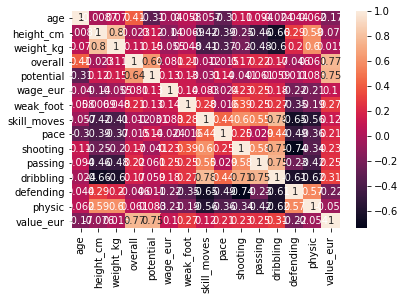

In [5]:
corr = Players_df.corr()
sns.heatmap(corr, annot=True)

In [6]:
X = Players_df.iloc[ : , [4,5,6]].values
y = Players_df.iloc[ : , 15].values

In [7]:
from sklearn import metrics
def run_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    yPrediction = model.predict(X_test)
    return metrics.mean_absolute_error(y_test, yPrediction),metrics.mean_squared_error(y_test, yPrediction), np.sqrt(metrics.mean_squared_error(y_test, yPrediction)), metrics.r2_score(y_test, yPrediction)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [10]:
print('\t\t\t MAE\t\t\t MSE\t\t\t RMSE\t\t\t R2 Score',)
mae, mse, rmse, r2 = run_models(LinearRegression(),X_train,X_test,y_train,y_test)
print('Linear Regression:\t', mae,'\t', mse, '\t', rmse, '\t', r2)
mae, mse, rmse, r2 = run_models(DecisionTreeRegressor(),X_train,X_test,y_train,y_test)
print('Decision Tree:\t\t', mae,'\t', mse, '\t', rmse, '\t', r2)

			 MAE			 MSE			 RMSE			 R2 Score
Linear Regression:	 6.9512856087702275 	 111.19728645215072 	 10.545012396965246 	 0.7240160151018331
Decision Tree:		 9.097826086956522 	 255.5951086956522 	 15.98734213981962 	 0.36563059343484694
